In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import os

In [2]:
with open("AQQS_allatom_optimized_geometry.lt", "r") as file:
    file_content = file.readlines()

# Create a DataFrame with each line as a separate row in a single column
monomer = pd.DataFrame(file_content, columns=['data'])
data = monomer[monomer["data"].str.contains(r"\$atom\:[A-Z]\d+\s+\$mol")].reset_index(drop=True)
data["data"] = data["data"].str.split('\s')
data["data"] = data["data"].apply(lambda x: list(filter(None, x)))
data["numr elements"] = data["data"].apply(lambda x: x[0].replace("$atom:", ""))
data["elements"] = data["numr elements"].str.replace(r"\d+", "", regex=True)
data["gromos elemts"] = data["data"].apply(lambda x: x[2].replace("@atom:", ""))
data["charge"] = data["data"].apply(lambda x: x[3]).astype(float)
data["x"] = data["data"].apply(lambda x: x[4]).astype(float)
data["y"] = data["data"].apply(lambda x: x[5]).astype(float)
data["z"] = data["data"].apply(lambda x: x[6]).astype(float)
data.drop("data", axis=1, inplace=True)

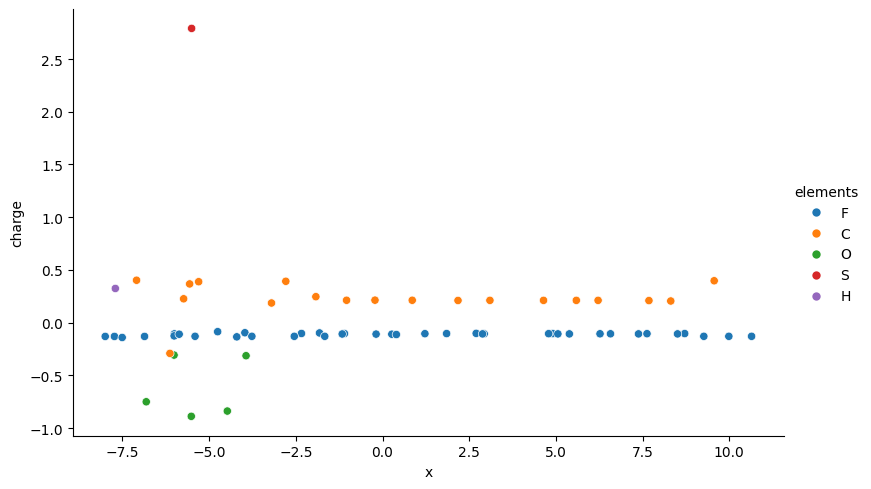

In [3]:
sns.relplot(data=data, x='x', y='charge', hue='elements', hue_order=data["elements"].unique(), aspect=1.61);

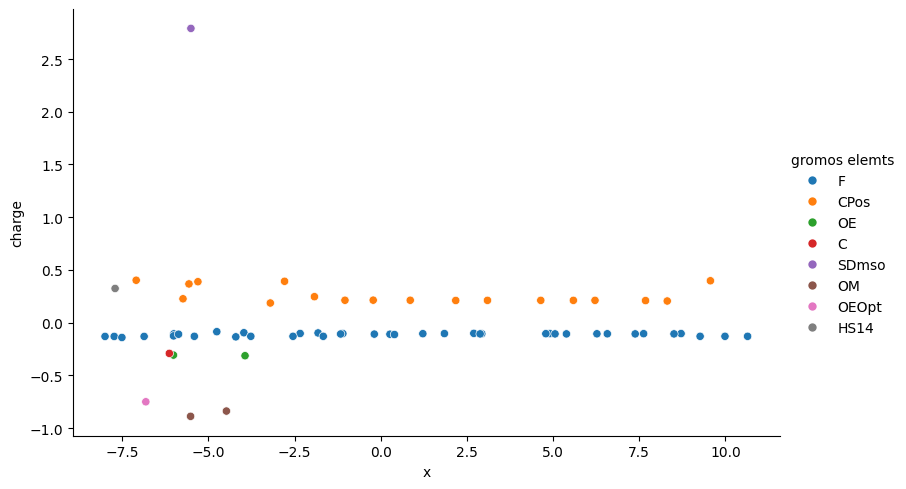

In [4]:
sns.relplot(data=data, x='x', y='charge', hue='gromos elemts', hue_order=data["gromos elemts"].unique(), aspect=1.61);